In [1]:
# import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# display matplotlib graph's within notebook
%matplotlib inline 
import numpy as np
import os

np.set_printoptions(precision=3,suppress=True)

In [2]:
# Aufgabe 1
# Daten
points_size = 100
num_iters = 400
alpha = 0.01
J_history = np.zeros((num_iters, 1))

x_1 = np.random.uniform(0, 50, points_size)
x_2 = np.random.uniform(0, 50, points_size)
X = np.column_stack((x_1, x_2))
#X = np.matrix(X)
m = len(X)
X_norm = np.append(np.ones((m,1)), X, axis=1)
#X_norm = np.matrix(X_norm)
print("X_norm till 10: ", X_norm[:10])


X_norm till 10:  [[ 1.    45.65  45.27 ]
 [ 1.    25.156 25.371]
 [ 1.    43.831 11.131]
 [ 1.    11.67  20.256]
 [ 1.    32.921 14.208]
 [ 1.    34.024  8.185]
 [ 1.    29.234 34.215]
 [ 1.    16.883 31.314]
 [ 1.    37.809  5.587]
 [ 1.    34.556 30.619]]


In [3]:
# Aufgabe 2
def linear_hypothesis(theta):
    def h(X):
        y = np.ndarray.flatten(np.dot(X_norm, np.transpose(theta)))
        return y
    return h

In [4]:
# Aufgabe 3
# a) Y
theta = np.array([1.1, 2.0, 9]) 
h = linear_hypothesis(theta)
y_pure = h(X_norm)
Y = y_pure + np.random.uniform(0, 10, points_size)
#Y = np.matrix(Y)
print("Y till 10: ", Y[:10])

Y till 10:  [500.585 284.65  189.59  215.268 198.585 151.231 375.082 325.17  136.468
 349.63 ]


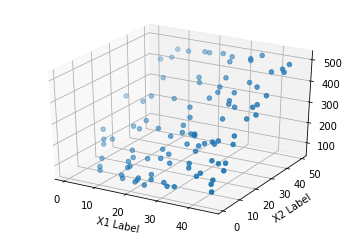

In [5]:
# b) Plotten ohne Scaling
fig = plt.figure("b")
ax = fig.gca(projection='3d')
ax.scatter(xs = X_norm[:,1], ys = X_norm[:,2], zs = Y)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
plt.show()

In [6]:
# c) Feature scaling
# create array's of zeros for mean and standart deviation
X_norm = X
mu = np.zeros((1,np.size(X[:1])))
sigma = np.zeros((1,np.size(X[:1])))
# Normalize X data
for i in range(np.size(mu)):
    # Identify mean value for each dimension/column
    mu[:,i] = np.mean(X[:,i])
    # Identify standard deviation value for each dimension/column
    sigma[:,i] = np.std(X[:,i])
    # Set X_norm equal to the X normalized value ((value-meanValue)/standardDeviation)
    X_norm[:,i] = (X[:,i]-mu[:,i])/sigma[:,i]

In [7]:
# Print mit Scaling
X_norm = np.append(np.ones((m,1)), X_norm, axis=1)
print("X_norm till 10: ", X_norm[:10])

X_norm till 10:  [[ 1.     1.534  1.563]
 [ 1.    -0.095  0.203]
 [ 1.     1.39  -0.77 ]
 [ 1.    -1.167 -0.146]
 [ 1.     0.522 -0.559]
 [ 1.     0.61  -0.971]
 [ 1.     0.229  0.807]
 [ 1.    -0.753  0.609]
 [ 1.     0.911 -1.148]
 [ 1.     0.652  0.562]]


In [8]:
# Aufgabe 4
def cost_function(X_norm, y):
    def j(theta):
        J_cost = 0
        for j in range(m):
            J_cost = J_cost + ((1/(2*m))*np.square(np.dot(np.transpose(theta),np.transpose(X_norm[j,:]))-y[j]))
        return J_cost
    return j

In [9]:
# Aufgabe 5
# a)
def compute_new_theta (X_norm, Y, theta, alpha):
    #theta_temp = theta - np.dot(np.transpose(X_norm),np.ndarray.flatten(np.dot(X_norm,theta)) - Y)*(alpha/m)
    h = linear_hypothesis(theta)
    theta_temp = theta - np.dot(np.transpose(X_norm), h(X_norm) - Y)*(alpha/m)
    return theta_temp

In [ ]:
# b), c)
def gradient_descent(alpha, theta, X_norm, Y):
    for i in range(num_iters):
        theta = compute_new_theta(X_norm, Y, theta, alpha)
        for j in range(m):
            j = cost_function(X_norm, Y)
            J_cost = j(theta)
            J_history[i] = J_cost
    return J_history, theta

In [ ]:
theta_test = np.array([0, 0, 0]) 
J_history, theta_result = gradient_descent(alpha, theta_test, X_norm, Y)
print(theta_result)
plt.plot(J_history)

#print("X_norm1 till 10: ", X_norm[:, 1])
#print("X_norm2 till 10: ", X_norm[:, 2])
#print("Y till 10: ", Y)

In [ ]:
# test
#print("Y_before till 10: ", Y[:10])
h = linear_hypothesis(theta_result)
Y = h(X_norm)
#print("Y_after till 10: ", Y[:10])

In [ ]:
# Aufgabe 6
#print(theta_result[0])
#print(np.matrix(theta_result[2]))

#print("X_norm1 till 10: ", X_norm[:, 1])
#print("X_norm2 till 10: ", X_norm[:, 2])
#print("Y till 10: ", Y)

#plt3d = plt.figure().gca(projection='3d')
#plt3d.plot_surface(X = np.matrix(X_norm[:, 1]), Y = np.matrix(X_norm[:, 2]), Z = np.matrix(Y), alpha=0.2)

#ax = plt.gca()
#ax.hold(True)
#ax.scatter(xs = X_norm[:,1], ys = X_norm[:,2], zs = Y)

In [ ]:
point  = np.array([1, 2, 3])
normal = np.array([1, 1, 2])

point2 = np.array([10, 50, 50])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(10), range(10))
xx = np.matrix(xx)
yy = np.matrix(yy)

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
z = np.matrix(z)

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha=0.2)

print(xx)
print(yy)
print(z)

plt.show()